In [1]:
import pandas as pd
import dill
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook,export_png
from bokeh.layouts import row
import bokeh.palettes as palettes 
output_notebook()

Loading BokehJS ...

In [2]:
#Get results from first analysis

lstWeights,lstCols,lstReturnsLR,lstCovLR,lstfactBetasLR, lstfactInterceptsLR,lsterrEstLR = dill.load(open('output_v4/FinalProject_v4_LRVariables.db','rb'))
dfBmk = pd.read_csv('output_v4/dfBmk_v4.csv',parse_dates=['MonthYear'])
dfEstLR = pd.read_csv('output_v4/dfEstLR_v4.csv',parse_dates=['Date'])
dfActLR = pd.read_csv('output_v4/dfActLR_v4.csv',parse_dates=['Date'])
dfSecRtn = pd.read_csv('output_v4/dfSecRtn_v4.csv',parse_dates=['Date'])
dfFamaData = pd.read_csv('output_v4/dfFamaData_v4.csv',parse_dates=['YearMonth'])
dfConstList = pd.read_csv('output_v4/dfConstList_v4.csv')

#Bayes results
dfEstB = pd.read_csv('output_v4/dfEstB_v4.csv',parse_dates=['Date'])
dfActB = pd.read_csv('output_v4/dfActB_v4.csv',parse_dates=['Date'])
lstWeightsB,lstReturnsB,lstCovB,lstfactBetasB, lstfactInterceptsB,lsterrEstB = dill.load(open('output_v4/FinalProject_v4_BayesVariables.db','rb'))

dfBmk.set_index('MonthYear', inplace=True)
dfSecRtn.set_index('Date', inplace=True)
dfFamaData.set_index('YearMonth', inplace=True)
dfActLR.set_index('Date', inplace=True)
dfEstLR.set_index('Date', inplace=True)
dfActB.set_index('Date', inplace=True)
dfEstB.set_index('Date', inplace=True)
dfActLR.drop(['Unnamed: 0'],axis=1, inplace=True)
dfEstB.drop(['Unnamed: 0'],axis=1, inplace=True)
dfEstLR.drop(['Unnamed: 0'],axis=1, inplace=True)
dfActB.drop(['Unnamed: 0'],axis=1, inplace=True)

In [3]:
AnnRtnLR = ((np.prod((1 + dfActLR/100)**(12/len(dfActLR))) -1)*100)
AnnRtnBayes = ((np.prod((1 + dfActB/100)**(12/len(dfActB))) -1)*100)
AnnRtnBmk = ((np.prod((1 + dfBmk.RETURN/100)**(12/len(dfBmk.RETURN))) -1)*100)
AnnStdLR = (((1 + dfActLR/100)-1).std() * np.sqrt(12/len(dfActLR))*100)
AnnStdBayes = ( ((1 + dfActB/100) -1).std() * np.sqrt(12/len(dfActB))*100)
AnnRtnELR = ((np.prod((1 + dfEstLR/100)**(12/len(dfEstLR))) -1)*100)
AnnRtnEBayes = ((np.prod((1 + dfEstB/100)**(12/len(dfEstB))) -1)*100)
AnnStdELR = (((1 + dfEstLR/100)-1).std() * np.sqrt(12/len(dfEstLR))*100)
AnnStdEBayes = ( ((1 + dfEstB/100) -1).std() * np.sqrt(12/len(dfEstB))*100)

In [4]:
print('Estimated Values')
print ('LR Annualized Rtn % 5.4f' %AnnRtnELR)
print ('Bayes Annualized Rtn  % 5.4f' % AnnRtnEBayes)
print('LR Annualized Volatility % 5.4f' %AnnStdELR)
print('Bayes Annualized Volatility  % 5.4f' %AnnStdEBayes)
print('LR Sharpe Ratio % 5.4f' %(dfEstLR.mean()/AnnStdELR))
print('Bayes Sharpe Ratio  % 5.4f' %(dfEstB.mean()/AnnStdEBayes))

print('Actual Values')

print ('LR Annualized Rtn % 5.4f' %AnnRtnLR)
print ('Bayes Annualized Rtn  % 5.4f' % AnnRtnBayes)
print ('BMK Annualized Rtn  % 5.4f' % AnnRtnBmk)
print('LR Annualized Volatility % 5.4f' %AnnStdLR)
print('Bayes Annualized Volatility  % 5.4f' %AnnStdBayes)
print('LR Sharpe Ratio % 5.4f' %(dfActLR.mean()/AnnStdLR))
print('Bayes Sharpe Ratio  % 5.4f' %(dfActB.mean()/AnnStdBayes))

Estimated Values
LR Annualized Rtn  24.3902
Bayes Annualized Rtn   16.2403
LR Annualized Volatility  0.3059
Bayes Annualized Volatility   0.2571
LR Sharpe Ratio  6.0146
Bayes Sharpe Ratio   4.9221
Actual Values
LR Annualized Rtn  16.1673
Bayes Annualized Rtn   15.9110
BMK Annualized Rtn   6.8188
LR Annualized Volatility  1.3051
Bayes Annualized Volatility   1.3260
LR Sharpe Ratio  1.0314
Bayes Sharpe Ratio   1.0028


In [5]:
#get the constituent counts
dfPortCount = pd.DataFrame([ (w[0], sum([np.round(c,2) > 0 for c in w[1]['weight']])) for w in lstWeights], columns=['Date','Count'])
#get the difference in returns this is the error we are looking to minimize
dfDifLR = pd.DataFrame(np.subtract(dfActLR.Rtn, dfEstLR.Rtn), columns=['Rtn'])
MAE_LR = np.sum(abs(dfDifLR))/len(dfDifLR)
RMSE_LR = np.sqrt(np.sum(dfDifLR**2)/dfDifLR.size)
MSELR =  np.mean(np.subtract(abs(dfActLR.Rtn),abs(dfEstLR.Rtn))**2)
MAPE_LR = np.sum(abs((dfActLR - dfEstLR)/dfActLR))/dfActLR.size*(1/100)
SMAPE_LR = np.sum(abs(dfEstLR-dfActLR))/np.sum(dfEstLR+dfActLR)
CumErr_LR = (np.cumprod(1+dfEstLR.Rtn/100)*100)/(np.cumprod(1+dfActLR.Rtn/100)*100)

MSELR =  np.mean(np.subtract(np.log(1+ dfActLR.Rtn/100),np.log(1 + dfEstLR.Rtn/100))**2)*100

#dfEstLR.Rtn.abs().sum()/dfActLR.Rtn.abs().sum()

In [6]:
MSELR


0.17967124799232492

In [7]:
#Return analysis between predicted return weights and Index
dfMSELR = pd.DataFrame(np.subtract(abs(dfActLR.Rtn),abs(dfEstLR.Rtn))**2, columns=['Rtn'])

pBC = figure(title="MSE Linear Regression", toolbar_location=None, x_axis_type='datetime')
pBC.vbar(x=dfMSELR.index, top=dfMSELR.Rtn , width=1)
export_png(pBC, filename="plot.png")
show(pBC)

In [8]:
#get the constituent counts
dfPortCountB = pd.DataFrame([ (w[0], sum([np.round(c,2) > 0 for c in w[1]['weight']])) for w in lstWeightsB], columns=['Date','Count'])
#get the difference in returns this is the error we are looking to minimize
dfDifB = pd.DataFrame(np.subtract(dfActB.Rtn,dfEstB.Rtn), columns=['Rtn'])
MAE_B = np.sum(abs(dfDifB))/len(dfDifB)
RMSE_B = np.sqrt(np.sum(dfDifB**2)/dfDifB.size)
MSEB = np.mean(np.subtract(abs(dfActB.Rtn),abs(dfEstB.Rtn))**2)
MAPE_B = np.sum(abs((dfActB - dfEstB)/dfActB))/dfActB.size*(1/100)
SMAPE_B = np.sum(abs(dfEstB-dfActB))/np.sum(dfEstB+dfActB)

CumErr_B = (np.cumprod(1+dfEstB.Rtn/100)*100)/(np.cumprod(1+dfActB.Rtn/100)*100)

MSEB =  np.mean(np.subtract(np.log(1 + dfEstB.Rtn/100),np.log(1+ dfActB.Rtn/100))**2)*100

In [9]:
SMAPE_B
MAE_B
CumErr_B.describe()

count    129.000000
mean       0.970788
std        0.083507
min        0.798366
25%        0.909630
50%        0.971435
75%        1.035287
max        1.215557
Name: Rtn, dtype: float64

In [10]:
dfPortCountB.describe()

,Count
count,129.000000
mean,37.852713
std,3.199367
min,28.000000
25%,36.000000
50%,38.000000
75%,40.000000
max,49.000000


In [11]:
dfPortWeights = pd.DataFrame([ (w[0], np.mean([np.round(c,2)  for c in w[1]['weight'] if np.round(c,2)>0]),min([np.round(c,2) for c in w[1]['weight'] if np.round(c,2)>0]),max([np.round(c,2) for c in w[1]['weight']])) for w in lstWeights], columns=['Date','Mean', 'Min','Max'])

In [12]:
dfPortWeights = pd.DataFrame([ (w[0], [np.round(c,2)  for c in w[1]['weight'] if np.round(c,2)>0]) for w in lstWeightsB], columns=['Date','Wght'])
dfPortWeights = pd.DataFrame([(np.mean(m), min(m), max(m)) for m in dfPortWeights['Wght']], columns=['mean','min','max'])

In [13]:
dfPortWeights.describe()

,mean,min,max
count,129.000000,1.290000e+02,129.000000
mean,0.026364,1.000000e-02,0.083023
std,0.002176,6.965946e-18,0.018269
min,0.020851,1.000000e-02,0.050000
25%,0.024872,1.000000e-02,0.070000
50%,0.026216,1.000000e-02,0.080000
75%,0.027568,1.000000e-02,0.090000
max,0.033571,1.000000e-02,0.140000


#### Show constituent counts after Optimizer ran

In [14]:
pB = figure(title="Bayes Constituent Counts", toolbar_location=None, x_axis_type='datetime')
pB.vbar(x=dfPortCountB.Date, top=dfPortCountB.Count , width=.9)
pLR = figure(title="LR Constituent Counts", toolbar_location=None, x_axis_type='datetime')
pLR.vbar(x=dfPortCount.Date, top=dfPortCount.Count , width=.9)
export_png(pB, filename="plot.png")
show(row(pLR, pB) )

In [15]:
pLRC = figure(title="LR Difference between predicted return for period and actual return", toolbar_location=None, x_axis_type='datetime')
pLRC.vbar(x=dfDifLR.index, top=dfDifLR.Rtn , width=1)
pBC = figure(title="BayesDifference between predicted return for period and actual return", toolbar_location=None, x_axis_type='datetime')
pBC.vbar(x=dfDifB.index, top=dfDifB.Rtn , width=1)
show(row(pLRC, pBC))

In [16]:
dfDifLR

,Rtn
Date,
2009-01-01,-5.038291
2009-02-01,-14.516597
2009-03-01,5.245625
2009-04-01,12.857268
2009-05-01,-1.245973
...,...
2019-05-01,-6.828930
2019-06-01,4.018777
2019-07-01,-2.339801


In [17]:
#Return analysis between predicted return weights and Index
colors = palettes.all_palettes['Set1'][5]
p = figure(title="Return Comparison", toolbar_location=None, x_axis_type='datetime')

p.line(x=dfBmk[dfEstLR.index.min():].index, y=np.cumprod(1+dfBmk[dfEstLR.index.min():].RETURN/100)*100, color=colors[0], legend='R1000', line_width=2)
#p.line(x=dfEstLR.index, y=np.cumprod(1+dfEstLR.Rtn/100)*100,  color=colors[1],legend='LR Expected Return', line_width=2)
#p.line(x=dfActLR.index, y=np.cumprod(1+dfActLR.Rtn/100)*100,  color=colors[2],legend='LR Actual Return', line_width=2)
p.line(x=dfEstB.index, y=np.cumprod(1+dfEstB.Rtn/100)*100,  color=colors[3],legend='Bayes Expected Return', line_width=2)
p.line(x=dfActB.index, y=np.cumprod(1+dfActB.Rtn/100)*100,  color=colors[4],legend='Bayes Actual Return', line_width=2)
p.legend.location = "top_left"
export_png(p, filename="plot.png")
show(p)

In [18]:
#Return analysis between predicted return weights and Index
colors = palettes.all_palettes['Set1'][5]
p = figure(title="Return Comparison", toolbar_location=None, x_axis_type='datetime')

p.line(x=dfBmk[dfEstLR.index.min():].index, y=np.cumprod(1+dfBmk[dfEstLR.index.min():].RETURN/100)*100, color=colors[0], legend='R1000', line_width=2)
p.line(x=dfEstLR.index, y=np.cumprod(1+dfEstLR.Rtn/100)*100,  color=colors[1],legend='LR Expected Return', line_width=2)
p.line(x=dfActLR.index, y=np.cumprod(1+dfActLR.Rtn/100)*100,  color=colors[2],legend='LR Actual Return', line_width=2)
#p.line(x=dfEstB.index, y=np.cumprod(1+dfEstB.Rtn/100)*100,  color=colors[3],legend='Bayes Expected Return', line_width=2)
#p.line(x=dfActB.index, y=np.cumprod(1+dfActB.Rtn/100)*100,  color=colors[4],legend='Bayes Actual Return', line_width=2)
p.legend.location = "top_left"
export_png(p, filename="plot.png")
show(p)

In [19]:
#Return analysis between predicted return weights and Index
colors = palettes.all_palettes['Set1'][5]
p = figure(title="LR Error", toolbar_location=None, x_axis_type='datetime')
pBC = figure(title="Bayes Error", toolbar_location=None, x_axis_type='datetime')
p.line(x=dfDifB.index, y=np.cumprod(1+dfDifB.Rtn/100)*100,  color=colors[1],legend='Bayes Error', line_width=2)
p.line(x=dfDifLR.index, y=np.cumprod(1+dfDifLR.Rtn/100)*100,  color=colors[2],legend='LR Error', line_width=2)

p.legend.location = "top_left"
show(p)

In [20]:
dfRtn = []

for i,v in enumerate(lstCols):
    
    tmpdf = pd.DataFrame(data=np.concatenate((np.full((100,1),lstReturnsLR[i][0]),np.asarray(v).reshape(-1,1),lstReturnsLR[i][1].reshape(-1,1),lstReturnsB[i][1].reshape(-1,1)), axis=1), columns=['Date','Entity','LREstRtn','BEstRtn'])
    tmpact = dfSecRtn.loc[dfSecRtn.index.floor('D').isin([lstReturnsLR[i][0].strftime('%Y-%m-%d')]),tmpdf['Entity']]
    tmpact = tmpact.T.reset_index()
    tmpact.columns = ['Entity', 'ActRtn']
    tmpdf2 = pd.merge(tmpdf, tmpact, on=['Entity'])
    dfRtn.append(tmpdf2)
dfEstRtnAll = pd.concat(dfRtn, axis=0)  
dfEstRtnAll.reset_index(drop=True, inplace=True)    

In [21]:
#dfSecRtn[datetime(dfEstRtnAll.loc[0,'Date'].strftime('%Y-%m-%d'))]
#dfEstRtnAll.loc[0,'Date'].strftime('%Y-%m-%d')
#pd.to_datetime(dfEstRtnAll.loc[0,'Date']
dfEstRtnAll['MSELR'] = pd.to_numeric((dfEstRtnAll['ActRtn'] - dfEstRtnAll['LREstRtn'])**2)
dfEstRtnAll['MSEB'] = pd.to_numeric((dfEstRtnAll['ActRtn'] - dfEstRtnAll['BEstRtn'])**2)
dfStats = dfEstRtnAll[['Date','MSELR', 'MSEB']].groupby('Date').mean()
dfStats

,MSELR,MSEB
Date,,
2008-12-01,194.873422,200.440961
2009-01-01,210.250336,198.551525
2009-02-01,197.861323,196.048721
2009-03-01,517.051482,511.630438
2009-04-01,843.580496,852.018944
...,...,...
2019-04-01,58.567034,61.598549
2019-05-01,131.074270,117.984049
2019-06-01,84.993995,93.377473


In [22]:
#Return analysis between predicted return weights and Index
dfStats['difStats'] = dfStats.MSELR - dfStats.MSEB
pBC = figure(title="MSE Difference Bayes vs LR", toolbar_location=None, x_axis_type='datetime')
pBC.vbar(x=dfStats.index, top=dfStats.difStats , width=1)
export_png(pBC, filename="plot.png")
show(pBC)

In [23]:
difMSE = dfEstRtnAll['MSELR'] - dfEstRtnAll['MSEB']
pBC = figure(title="MSE Difference Bayes vs LR", toolbar_location=None, x_axis_type='datetime')
pBC.vbar(x=difMSE.index, top=difMSE , width=1)
export_png(pBC, filename="plot.png")
show(pBC)

In [24]:
w =  lstWeightsB[0][1][[np.round(c,2) > 0.0 for c in lstWeightsB[0][1]['weight']]].copy()
pw = figure(title="Bayes Weights", toolbar_location=None, x_range=w['Entity'])
pw.xaxis.major_label_orientation = np.pi/4
pw.vbar(x=w['Entity'], top=w['weight'], width=1)
show(pw)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
combined_returns = pd.concat([dfBmk.RETURN.rename('bm'), dfActLR.Rtn.rename('LR'), dfActB.Rtn.rename('Bayes')], axis=1).dropna()

In [27]:
combined_returns.corr()

,bm,LR,Bayes
bm,1.000000,-0.011979,-0.093774
LR,-0.011979,1.000000,0.936567
Bayes,-0.093774,0.936567,1.000000


In [28]:

combined_returns.sub(dfFamaData.loc[combined_returns.index.min():combined_returns.index.max(),'RF'], axis=0).mean()/combined_returns.std()*np.sqrt(12)

bm       1.004648
LR       1.059563
Bayes    1.029894
dtype: float64

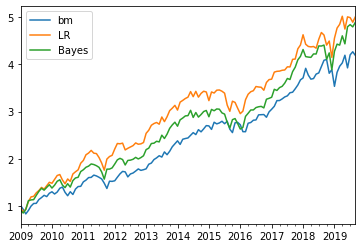

In [29]:
(combined_returns/100 +1).cumprod().plot()